In [1]:
import numpy as np
import os
import pandas as pd

I had trouble loading the entire data set, so I limited to 1000 rows and also set the INC Number Heading as the key/index numbers, then saving this as the new .csv

In [2]:
nRowsRead = 1000
df1 = pd.read_csv('../input/phoenix-crime-data/crimestat (1).csv', delimiter=',', nrows = nRowsRead, index_col='INC NUMBER')
df1.dataframeName = 'crimestat (1).csv'

In [3]:
df1.head(5)

,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
INC NUMBER,,,,,,
201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE
201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006,SINGLE FAMILY HOUSE
201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014,APARTMENT
201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307,SINGLE FAMILY HOUSE
201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043,SINGLE FAMILY HOUSE


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 201600000052855 to 201580008352
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   OCCURRED ON         997 non-null    object
 1   OCCURRED TO         770 non-null    object
 2   UCR CRIME CATEGORY  1000 non-null   object
 3   100 BLOCK ADDR      1000 non-null   object
 4   ZIP                 1000 non-null   int64 
 5   PREMISE TYPE        988 non-null    object
dtypes: int64(1), object(5)
memory usage: 54.7+ KB


In [5]:
df1.sort_values(by=['UCR CRIME CATEGORY','ZIP'])

,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
INC NUMBER,,,,,,
201500002122070,11/04/2015 08:47,NaN,AGGRAVATED ASSAULT,4XX W MONROE ST,85003,NaN
201500002122447,11/04/2015 00:25,11/04/2015 00:45,AGGRAVATED ASSAULT,1XX N 2ND ST,85004,BAR / LOUNG / NIGHT CLUB
201500002110212,11/02/2015 13:55,11/02/2015 13:55,AGGRAVATED ASSAULT,E ROOSEVELT ST & N 16TH ST,85006,STREET / ROADWAY / ALLEY / SIDEWALK
201500002118199,11/03/2015 16:13,NaN,AGGRAVATED ASSAULT,17XX W POLK ST,85007,FENCED RESIDENTIAL YARD
201500002139229,11/06/2015 18:49,11/06/2015 18:49,AGGRAVATED ASSAULT,9XX W MOHAVE ST,85007,DRIVEWAY
...,...,...,...,...,...,...
201500002101137,11/01/2015 04:14,NaN,ROBBERY,138XX S 44TH ST,85044,STREET / ROADWAY / ALLEY / SIDEWALK
201500002118140,11/03/2015 16:00,11/03/2015 16:03,ROBBERY,152XX S 50TH ST,85044,HOTEL / MOTEL
201500002137941,11/06/2015 16:00,11/06/2015 16:05,ROBBERY,34XX W DUNLAP AVE,85051,PARKING LOT


I decided to look at Crime Categories groupings then Zip Codes in which crimes were occuring. Here I had only filteres the data so I made new data frames and grouped by these categories to manipulate.

In [6]:
df1.ZIP.value_counts()

85015    53
85035    48
85041    48
85017    46
85009    43
85008    41
85043    40
85051    37
85023    36
85033    35
85031    33
85042    32
85029    31
85016    30
85032    29
85040    29
85019    27
85022    23
85021    23
85027    21
85339    21
85014    20
85254    19
85044    17
85013    17
85034    17
85006    16
85353    14
85020    14
85037    12
85053    12
85007    11
85004    11
85085    10
85003    10
85048    10
85018     9
85024     9
85012     8
85308     8
85054     6
85028     5
85050     3
85086     3
85306     3
85307     3
85331     3
85083     2
85045     1
85310     1
Name: ZIP, dtype: int64

In [7]:
crime_loc=df1.groupby('ZIP')

In [8]:
crime_cat=df1.groupby('UCR CRIME CATEGORY')

In [9]:
crime_cat.ZIP.describe()

,count,mean,std,min,25%,50%,75%,max
UCR CRIME CATEGORY,,,,,,,,
AGGRAVATED ASSAULT,61.0,85044.016393,80.707805,85003.0,85014.00,85022.0,85035.00,85353.0
ARSON,2.0,85015.500000,10.606602,85008.0,85011.75,85015.5,85019.25,85023.0
BURGLARY,194.0,85056.056701,88.098166,85003.0,85015.25,85030.0,85042.00,85353.0
DRUG OFFENSE,69.0,85038.623188,58.548648,85004.0,85015.00,85023.0,85043.00,85339.0
LARCENY-THEFT,477.0,85048.461216,73.401488,85003.0,85017.00,85031.0,85042.00,85353.0
MOTOR VEHICLE THEFT,135.0,85050.740741,82.852680,85003.0,85017.00,85031.0,85041.00,85353.0
MURDER AND NON-NEGLIGENT MANSLAUGHTER,1.0,85043.000000,NaN,85043.0,85043.00,85043.0,85043.00,85043.0
RAPE,21.0,85039.571429,62.777840,85006.0,85015.00,85032.0,85034.00,85308.0
ROBBERY,40.0,85028.775000,15.494395,85008.0,85016.75,85026.0,85041.00,85086.0


In [10]:
import matplotlib as plot

<AxesSubplot:xlabel='UCR CRIME CATEGORY'>

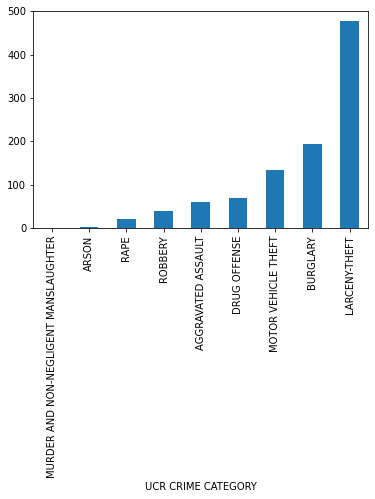

In [11]:
crime_cat.ZIP.count().sort_values().plot.bar()

In [12]:
crime_cat.ZIP.value_counts()

UCR CRIME CATEGORY  ZIP  
AGGRAVATED ASSAULT  85009    5
                    85035    5
                    85008    4
                    85017    4
                    85014    3
                            ..
ROBBERY             85029    1
                    85032    1
                    85035    1
                    85040    1
                    85086    1
Name: ZIP, Length: 225, dtype: int64

<AxesSubplot:xlabel='UCR CRIME CATEGORY,ZIP'>

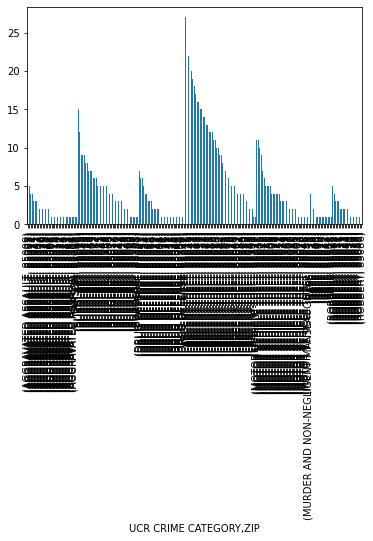

In [13]:
crime_cat.ZIP.value_counts().plot.bar()

Can now look at Crime Category within each zip code and use that to isolate specific areas to focus specilized crime units, ie. focusing the OCU (Organized Crime Unit), in Zip Codes with higher rates of Drug Offences.